In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import tensorflow as tf
from tensorflow.keras import models, layers

In [53]:
data = pd.read_csv(r"data\output.csv")

In [54]:
data.head()

,Unnamed: 0,text,sentiment,label
0,0,"module , ek program hoti hai , jismen ya to so...",neutral,1
1,1,aur hamne aume samood ke pas unke bhaee saleh ...,positive,2
2,2,"aur jab unhen yad dilaya jata hai , to ve yad ...",neutral,1
3,3,tumhen २०११ ka ted prize mil gaya hai\n,positive,2
4,4,unhonne bad science karne ke lie ye delhi univ...,neutral,1


In [55]:
data = data.drop(columns=['Unnamed: 0'])

In [56]:
data.shape

(2766, 3)

In [57]:
data.isnull().sum()

text         0
sentiment    0
label        0
dtype: int64

In [58]:
data.dropna(inplace=True)

In [59]:
data.isnull().sum()

text         0
sentiment    0
label        0
dtype: int64

In [60]:
data['label'].value_counts()

label
1    1234
2     987
0     545
Name: count, dtype: int64

In [61]:
data['sentiment'].value_counts()

sentiment
neutral     1234
positive     987
negative     545
Name: count, dtype: int64

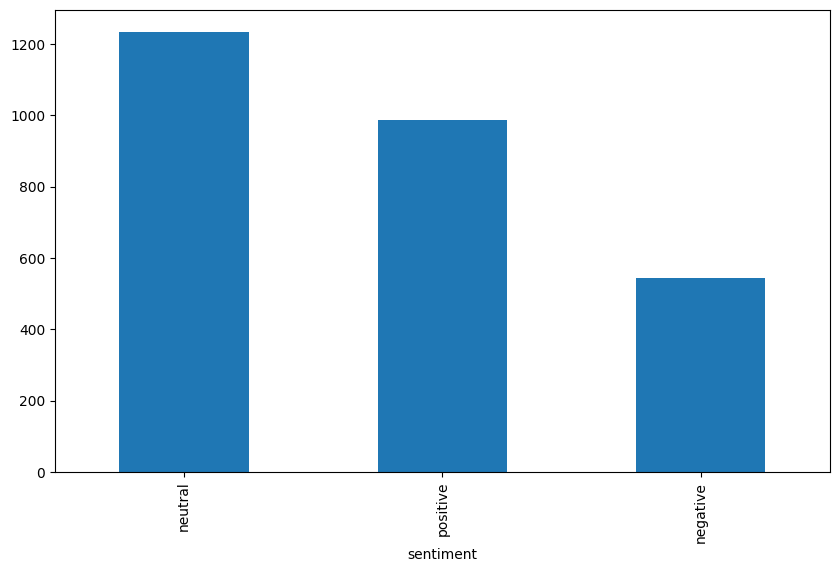

In [62]:
plt.figure(figsize=(10,6))
data['sentiment'].value_counts().plot.bar()
plt.show()

In [63]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [64]:
def text_preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return ''.join(text)

In [65]:
data["cleaned_text"] = data["text"].apply(text_preprocess)

In [66]:
data.head()

,text,sentiment,label,cleaned_text
0,"module , ek program hoti hai , jismen ya to so...",neutral,1,module ek program hoti hai jismen ya to source...
1,aur hamne aume samood ke pas unke bhaee saleh ...,positive,2,aur hamne aume samood ke pas unke bhaee saleh ...
2,"aur jab unhen yad dilaya jata hai , to ve yad ...",neutral,1,aur jab unhen yad dilaya jata hai to ve yad na...
3,tumhen २०११ ka ted prize mil gaya hai\n,positive,2,tumhen ka ted prize mil gaya hai
4,unhonne bad science karne ke lie ye delhi univ...,neutral,1,unhonne bad science karne ke lie ye delhi univ...


In [67]:
data["text"][0]

'module , ek program hoti hai , jismen ya to source code ya machine language ke form men instructions nihit hote hain.\n'

In [161]:
data["cleaned_text"][4]

'unhonne bad science karne ke lie ye delhi university ke kirorimal college chale ge jahan inhonne vijnjan graduate ki degree prapt ki'

In [69]:
data[["text", "cleaned_text"]].head()

,text,cleaned_text
0,"module , ek program hoti hai , jismen ya to so...",module ek program hoti hai jismen ya to source...
1,aur hamne aume samood ke pas unke bhaee saleh ...,aur hamne aume samood ke pas unke bhaee saleh ...
2,"aur jab unhen yad dilaya jata hai , to ve yad ...",aur jab unhen yad dilaya jata hai to ve yad na...
3,tumhen २०११ ka ted prize mil gaya hai\n,tumhen ka ted prize mil gaya hai
4,unhonne bad science karne ke lie ye delhi univ...,unhonne bad science karne ke lie ye delhi univ...


In [70]:
def text_processing(text):
    lemmatizer = WordNetLemmatizer()
    text = word_tokenize(text)
    text = [word for word in text if word not in stopwords.words('english')]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in text]
    return ' '.join(lemmatized_tokens)

In [71]:
data["cleaned_text"] = data["cleaned_text"].apply(text_processing)

In [72]:
data.head()

,text,sentiment,label,cleaned_text
0,"module , ek program hoti hai , jismen ya to so...",neutral,1,module ek program hoti hai jismen ya source co...
1,aur hamne aume samood ke pas unke bhaee saleh ...,positive,2,aur hamne aume samood ke pa unke bhaee saleh k...
2,"aur jab unhen yad dilaya jata hai , to ve yad ...",neutral,1,aur jab unhen yad dilaya jata hai yad nahin karte
3,tumhen २०११ ka ted prize mil gaya hai\n,positive,2,tumhen ka ted prize mil gaya hai
4,unhonne bad science karne ke lie ye delhi univ...,neutral,1,unhonne bad science karne ke lie ye delhi univ...


In [73]:
X = data['cleaned_text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 2212
Testing set size: 554


In [74]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

In [75]:
X_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
X_test_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32013864, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [77]:
print("TF-IDF Feature matrix shape:", X_train_tfidf.shape)

TF-IDF Feature matrix shape: (2212, 5000)


In [78]:
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [79]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [80]:
multinom_model = MultinomialNB()
multinom_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [81]:
y_pred_lr = lr_model.predict(X_test_tfidf)
print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_lr))
print(accuracy_score(y_test, y_pred_lr))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.65      0.29      0.41       109
           1       0.69      0.85      0.76       247
           2       0.64      0.65      0.64       198

    accuracy                           0.67       554
   macro avg       0.66      0.60      0.60       554
weighted avg       0.66      0.67      0.65       554

0.6660649819494585


In [82]:
y_pred_rf = rf_model.predict(X_test_tfidf)
print("Random Forest Model Performance:\n")
print(classification_report(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf))

Random Forest Model Performance:

              precision    recall  f1-score   support

           0       0.90      0.56      0.69       109
           1       0.68      0.95      0.79       247
           2       0.85      0.61      0.71       198

    accuracy                           0.75       554
   macro avg       0.81      0.70      0.73       554
weighted avg       0.78      0.75      0.74       554

0.7490974729241877


In [83]:
y_pred_multi = multinom_model.predict(X_test_tfidf)
print("multinom_model Performance:\n")
print(classification_report(y_test, y_pred_multi))
print(accuracy_score(y_test, y_pred_multi))

multinom_model Performance:

              precision    recall  f1-score   support

           0       1.00      0.08      0.15       109
           1       0.61      0.87      0.71       247
           2       0.61      0.59      0.60       198

    accuracy                           0.61       554
   macro avg       0.74      0.51      0.49       554
weighted avg       0.68      0.61      0.56       554

0.6137184115523465


In [84]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

In [85]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [86]:
test_loss, test_accuracy = model.evaluate(X_test_tfidf, y_test)

18/18 [==============================] - 0s 3ms/step - loss: 1.0963 - accuracy: 0.4404


In [87]:
print(test_loss, test_accuracy)

1.096323013305664 0.44043320417404175


In [88]:
model.fit(X_train_tfidf, y_train, epochs=20, batch_size=32, validation_split=0.2, validation_data=(X_test_tfidf, y_test))

Epoch 1/20
70/70 [==============================] - 2s 11ms/step - loss: 1.0565 - accuracy: 0.4426 - val_loss: 1.0365 - val_accuracy: 0.4458
Epoch 2/20
70/70 [==============================] - 1s 7ms/step - loss: 1.0166 - accuracy: 0.4458 - val_loss: 0.9964 - val_accuracy: 0.4458
Epoch 3/20
70/70 [==============================] - 0s 7ms/step - loss: 0.8888 - accuracy: 0.5475 - val_loss: 0.8632 - val_accuracy: 0.5993
Epoch 4/20
70/70 [==============================] - 1s 8ms/step - loss: 0.6336 - accuracy: 0.7328 - val_loss: 0.7496 - val_accuracy: 0.7112
Epoch 5/20
70/70 [==============================] - 1s 8ms/step - loss: 0.4102 - accuracy: 0.8576 - val_loss: 0.7514 - val_accuracy: 0.7274
Epoch 6/20
70/70 [==============================] - 1s 9ms/step - loss: 0.2759 - accuracy: 0.9024 - val_loss: 0.7937 - val_accuracy: 0.7310
Epoch 7/20
70/70 [==============================] - 1s 8ms/step - loss: 0.1833 - accuracy: 0.9476 - val_loss: 0.8861 - val_accuracy: 0.7581
Epoch 8/20
70/70 [=

In [89]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                160032    
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                

In [90]:
print(data["text"][26])

pratyek jiv taste of death chakhnevala hai, aur tumhen to iyamat ke din poora-poora badla de diya jaega. ata jise aag jahannam se hatakar jannat men dail kar diya gaya, vah saphal raha. raha sansarik jivan, to vah maya-samagri ke siva kuchh bhi nahin



In [174]:
data[data["sentiment"] == "negative"].head()

,text,sentiment,label,cleaned_text
8,aur dharti ko ek samatal desolate maidan banak...,negative,0,aur dharti ko ek samatal desolate maidan banak...
12,aapki refuse ko dekhne ke lie unhen permission...,negative,0,aapki refuse ko dekhne ke lie unhen permission...
20,continue rakhen lagoo kar raha hai ke sath res...,negative,0,continue rakhen lagoo kar raha hai ke sath res...
25,uski man lakari ke bane kukurmutte par koee ph...,negative,0,uski man lakari ke bane kukurmutte par koee ph...
26,"pratyek jiv taste of death chakhnevala hai, au...",negative,0,pratyek jiv taste death chakhnevala hai aur tu...


In [179]:
data["cleaned_text"][20]

'continue rakhen lagoo kar raha hai ke sath resolved conflict'

In [180]:
test_data_pos = "continue rakhen lagoo kar raha hai ke sath resolved conflict"
test_data_neg = data["text"][26]
test_data_neu = data["text"][4]

In [181]:
test_pos_cleaned = text_preprocess(test_data_pos)
# test_neg_cleaned = text_preprocess(test_data_neg)
# test_neu_cleaned = text_preprocess(test_data_neu)

# test_pos_processed = text_processing(test_pos_cleaned)
# test_neg_processed = text_processing(test_neg_cleaned)
# test_neu_processed = text_processing(test_neu_cleaned)

# test_pos_array = tfidf_vectorizer.transform([test_pos_processed]).toarray()
# test_neg_array = tfidf_vectorizer.transform([test_neg_processed]).toarray()
# test_neu_array = tfidf_vectorizer.transform([test_neu_processed]).toarray()

In [182]:
rf_model.predict(test_pos_array)

array([2], dtype=int64)

In [148]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis")

texts = [
    "A new store opened near the station; I might check it out sometime."]

results = sentiment_pipeline(texts)
for text, result in zip(texts, results):
    print(f"Text: {text}\nSentiment: {result['label']}, Score: {result['score']}\n")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Text: A new store opened near the station; I might check it out sometime.
Sentiment: NEGATIVE, Score: 0.5911409258842468



In [142]:
tokenizerg = BertTokenizer.from_pretrained("bert-base-multilingual-uncased")
modelg = BertForSequenceClassification.from_pretrained("bert-base-multilingual-uncased", num_labels=3)

text = "The weather is okay today, not too hot or cold."
encoded_input = tokenizerg(text, return_tensors='pt')

output = modelg(**encoded_input)

logits = output.logits

probabilities = torch.softmax(logits, dim=1)

predicted_class = torch.argmax(probabilities, dim=1).item()

sentiment_labels = {0: "Negative", 1: "Neutral", 2: "Positive"}

predicted_sentiment = sentiment_labels[predicted_class]

print(f"Text: {text}")
print(f"Predicted Sentiment: {predicted_sentiment}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Text: The weather is okay today, not too hot or cold.
Predicted Sentiment: Neutral


In [96]:
lr_cm = confusion_matrix(y_test, y_pred_lr)
rf_cm = confusion_matrix(y_test, y_pred_rf)
multi_cm = confusion_matrix(y_test, y_pred_multi)

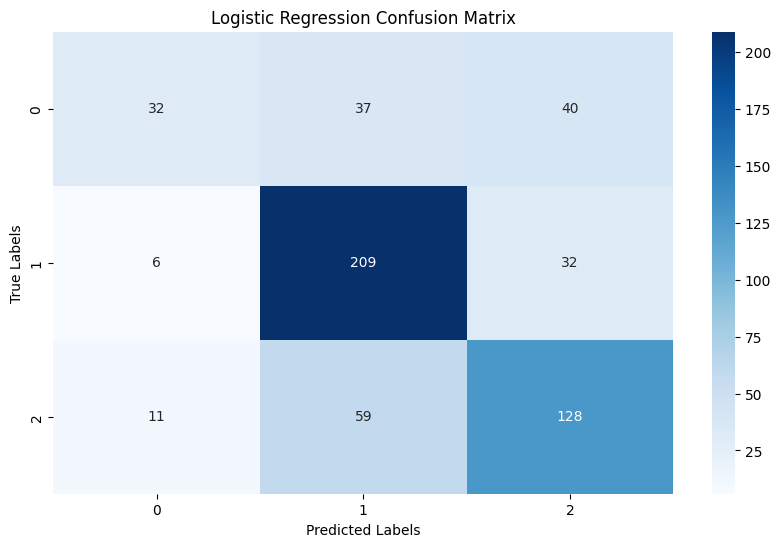

In [97]:
plt.figure(figsize=(10, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [101]:
joblib.dump(lr_model, 'models/lr_model.joblib')
joblib.dump(rf_model, 'models/rf_model.joblib')
# joblib.dump(multinom_model,'models/multi_model.joblib')

['models/multi_model.joblib']